## Exercise - Analysing Data Science Job Demand

In [1]:
# import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# create copy of df to extract jobs in US
df_US = df[df['job_country'] == 'United States'].copy()

In [4]:
df_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [8]:
# will create a new column in dataframe
# then new column will extract month from job_posted_date using .dt.strftime('%B')
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

df_US.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"['python', 'qlik']","{'analyst_tools': ['qlik'], 'programming': ['p...",November
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,None,NaN,NaN,Nayya,"['python', 'sql', 'go', 'ruby', 'ruby', 'javas...","{'cloud': ['aws'], 'other': ['terraform'], 'pr...",November
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",June
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None,September
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"['python', 'r', 'java']","{'programming': ['python', 'r', 'java']}",February


In [ ]:
# pivots original df_US then stores it into df_US_pivot variable
df_US_pivot = df_US.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')

In [14]:
df_US_pivot.reset_index(inplace = True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format = '%B').dt.month

df_US_pivot['month_no']

ValueError: cannot insert level_0, already exists

In [25]:
df_US_pivot.sort_values('month_no', inplace = True)
df_US_pivot.set_index('job_posted_month', inplace = True)
df_US_pivot.drop(columns = 'month_no', inplace = True)

KeyError: 'month_no'

In [29]:
df_US_pivot.drop(columns = 'index', inplace = True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [35]:
# top 3 job titles you want to analyse
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

# this will filter to only show the aforementioned job titles
df_new_pivot = df_US_pivot[top_3]

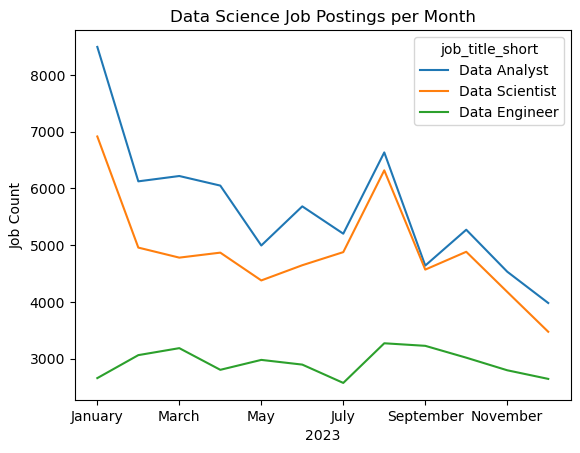

In [37]:
df_new_pivot.plot(kind = 'line')

plt.xlabel('2023')
plt.ylabel('Job Count')
plt.title('Data Science Job Postings per Month')
plt.show()